In [1]:
import numpy as np
import pandas as pd
import scipy.stats as sp
import matplotlib.pyplot as plt

In [6]:
#Import Data
data = pd.read_csv("BA_AirlineReviews.csv")

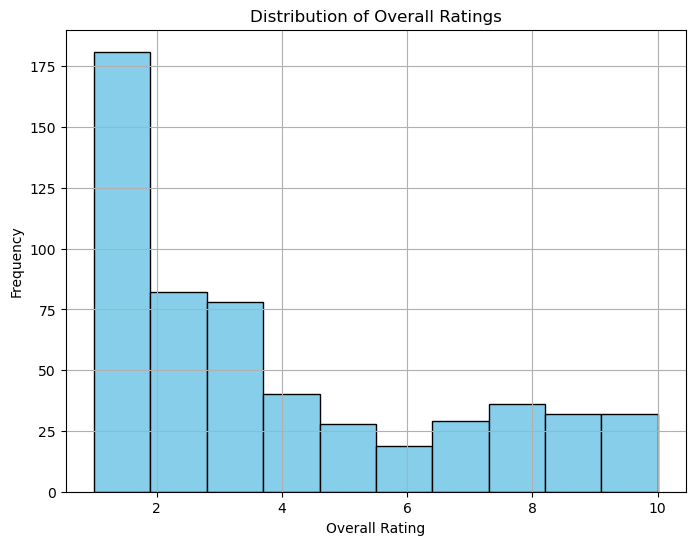

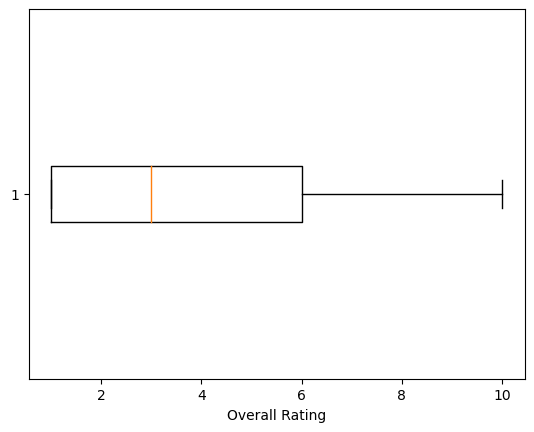

In [87]:
#Distribution of overall ratings
plt.figure(figsize=(8, 6))
plt.hist(data.OverallRating, color="skyblue", edgecolor="black")
plt.title("Distribution of Overall Ratings")
plt.xlabel("Overall Rating")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

plt.boxplot(data.OverallRating, vert = False)
plt.xlabel("Overall Rating")
plt.show()

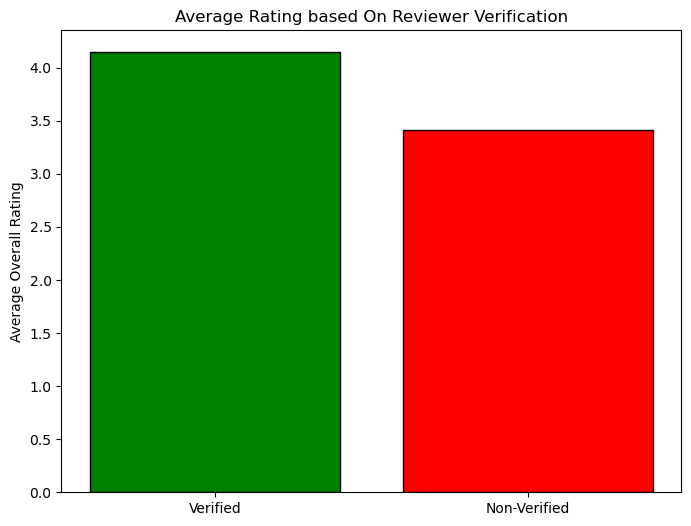

In [86]:
#Do verified reviewers tend to give higher ratings compared to non-verified reviewers?
verified = data.loc[data["VerifiedReview"], "OverallRating"].mean()
nonVerified = data.loc[~data["VerifiedReview"], "OverallRating"].mean()
labels = ["Verified", "Non-Verified"]
ratings = [verified, nonVerified]
plt.figure(figsize=(8,6))
plt.bar(labels, ratings, color =["green","red"], edgecolor=)
plt.title("Average Rating based On Reviewer Verification")
plt.ylabel("Average Overall Rating")
plt.show()

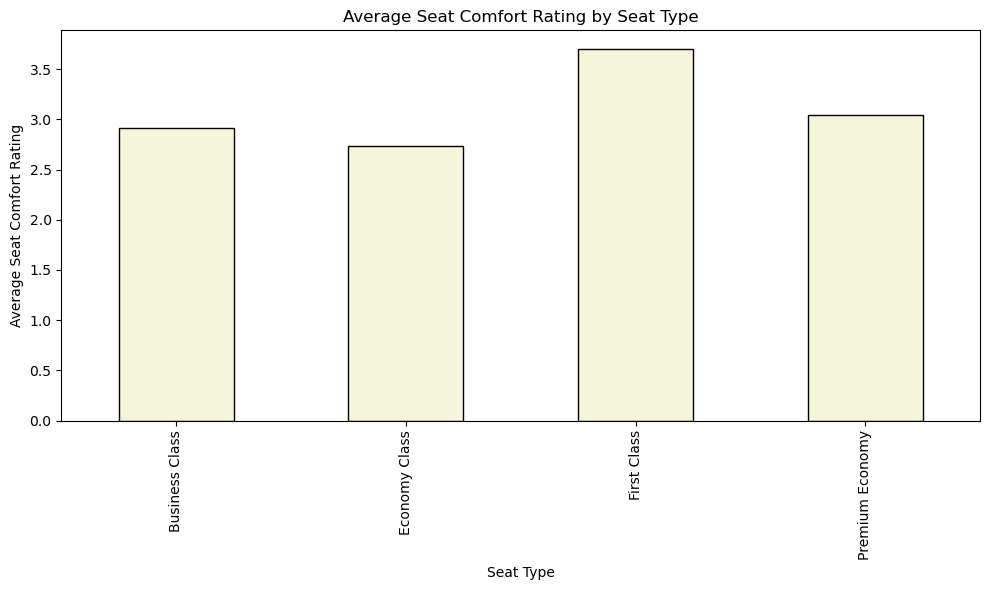

In [67]:
#How does seat comfort vary across seat types
avgComfort = data.groupby("SeatType")["SeatComfort"].mean()
plt.figure(figsize=(10,6))
avgComfort.plot(kind = "bar", color ="beige", edgecolor="black")
plt.title("Average Seat Comfort Rating by Seat Type")
plt.xlabel("Seat Type")
plt.ylabel("Average Seat Comfort Rating")
plt.tight_layout()
plt.show()

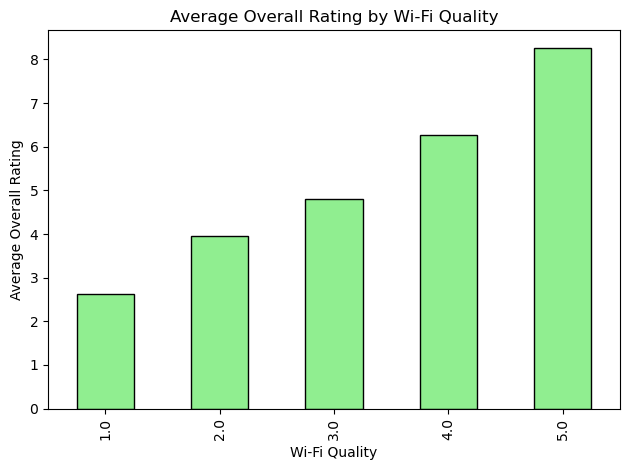

In [76]:
#Are ratings for in-flight entertainment and Wi-Fi correlated?
data.dropna(subset = ["OverallRating", "Wifi&Connectivity"], inplace=True)
wifiGroup = data.groupby("Wifi&Connectivity")
avgWifi = wifiGroup["OverallRating"].mean()

plt.figure()
avgWifi.plot(kind="bar", color ="lightgreen", edgecolor="black")
plt.title("Average Overall Rating by Wi-Fi Quality")
plt.xlabel("Wi-Fi Quality")
plt.ylabel("Average Overall Rating")
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

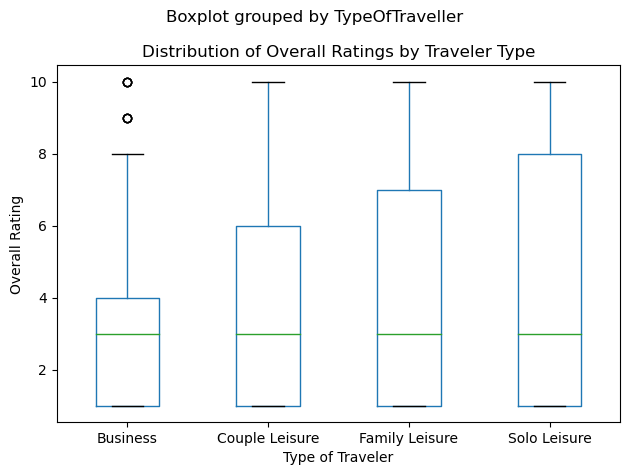

In [83]:
#How do overall ratings vary among different types of travelers
avgTraveler = data.groupby("TypeOfTraveller")["OverallRating"].mean()
plt.figure(figsize=(10, 6))
data.boxplot(column ="OverallRating", by="TypeOfTraveller", grid = False)
plt.title("Distribution of Overall Ratings by Traveler Type")
plt.xlabel("Type of Traveler")
plt.ylabel("Overall Rating")
plt.tight_layout()
plt.show()

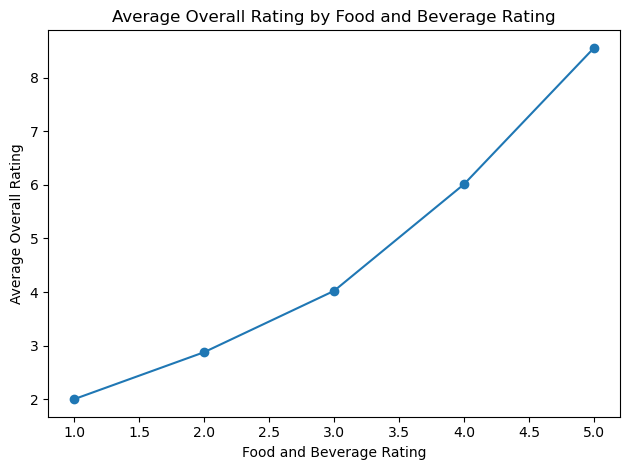

In [94]:
#How do the ratings for food and beverage influence the overall ratings
avgFood = data.groupby("Food&Beverages")["OverallRating"].mean()
plt.figure()
avgFood.plot(marker= "o", linestyle="-")
plt.title("Average Overall Rating by Food and Beverage Rating")
plt.xlabel("Food and Beverage Rating")
plt.ylabel("Average Overall Rating")
plt.tight_layout()
plt.show()

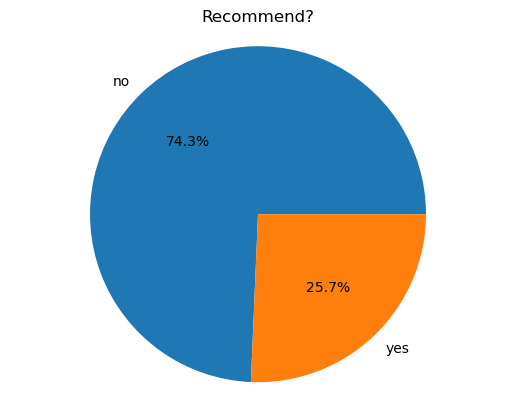

In [98]:
#Recommended vs not recommended
recommend = data["Recommended"].value_counts()
plt.figure()
plt.pie(recommend, labels = recommend.index, autopct = "%1.1f%%")
plt.title("Recommend?")
plt.axis("equal")
plt.show()

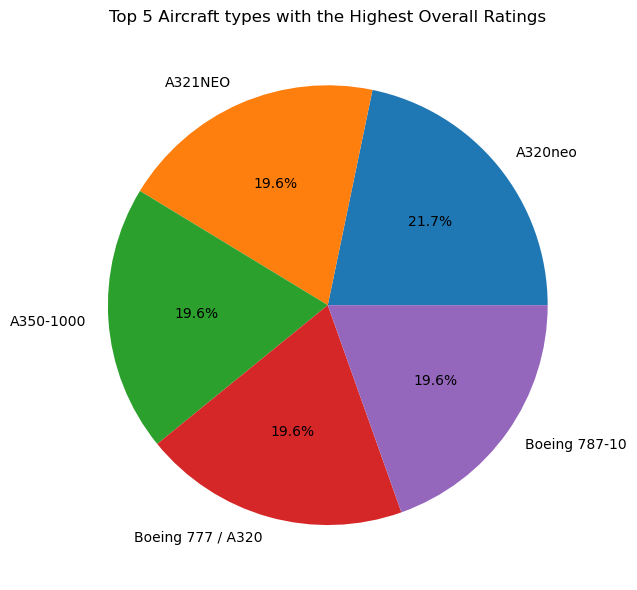

In [103]:
#Highest Rated aircrafts
data.dropna(subset=["OverallRating", "Aircraft"], inplace= True)
avgAircraft = data.groupby("Aircraft")["OverallRating"].mean()
topAircraft = avgAircraft.nlargest(5)

plt.figure(figsize= (8, 6))
plt.pie(topAircraft, labels = topAircraft.index, autopct = "%1.1f%%")
plt.title("Top 5 Aircraft types with the Highest Overall Ratings")
plt.tight_layout()
plt.show()